In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"E:\vinod sir complete data\vinod sir notes\Machine Learning\Random forest\ensemble technique\Breast Cancer Prediction\Dataset\cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
plt.rcParams['figure.figsize']=(15,6)

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
sns.heatmap(df.isnull())

# Diagnosis is a Target variable

In [15]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [20]:
df.diagnosis=df.diagnosis.replace(['B','M'],[0,1])

In [41]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [33]:
df.drop('id',axis=1,inplace=True)

In [42]:
x=df.loc[:,df.columns!='diagnosis']          # only predictors
y=df.loc[:,df.columns=='diagnosis']          # only target variable

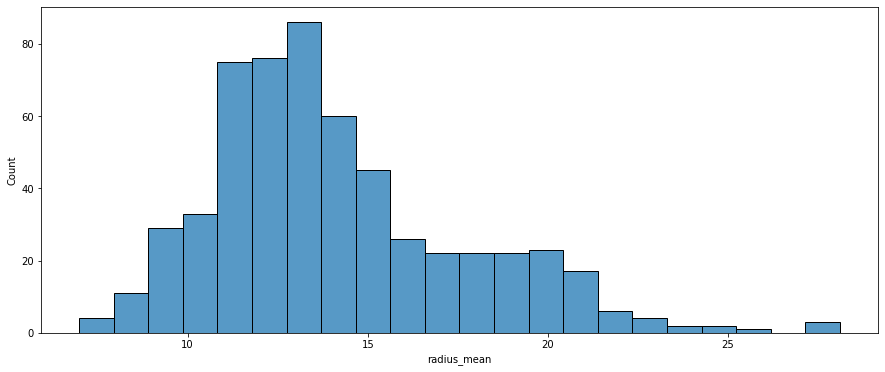

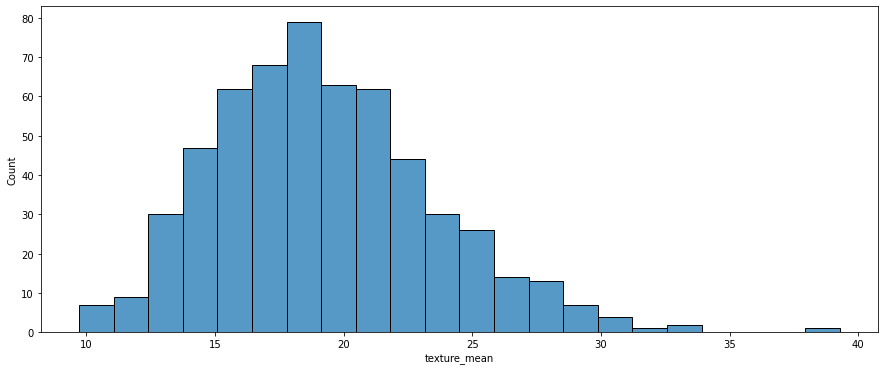

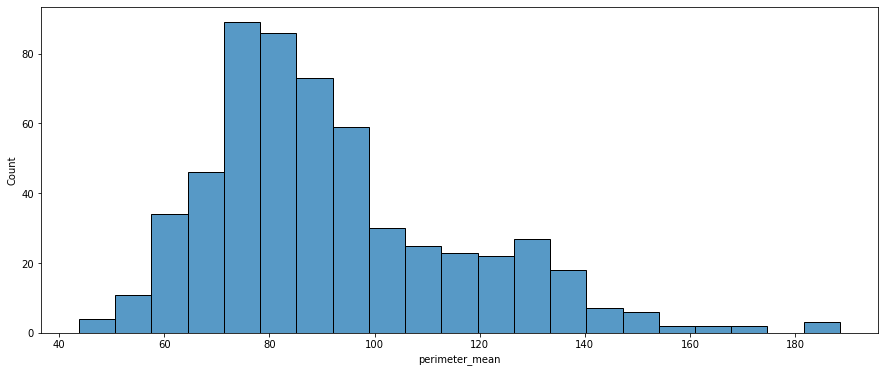

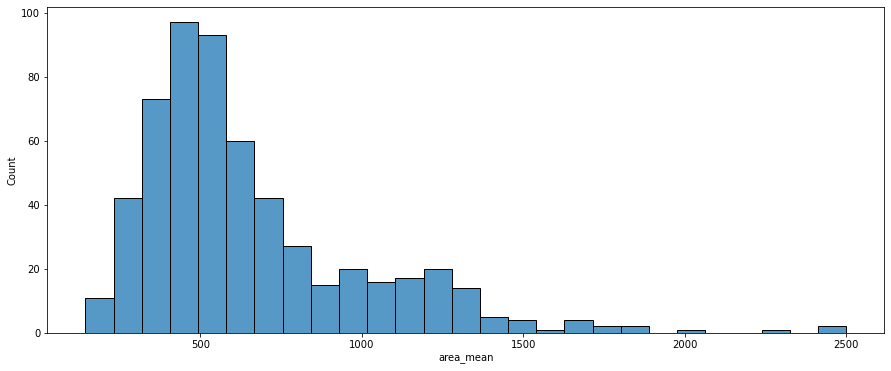

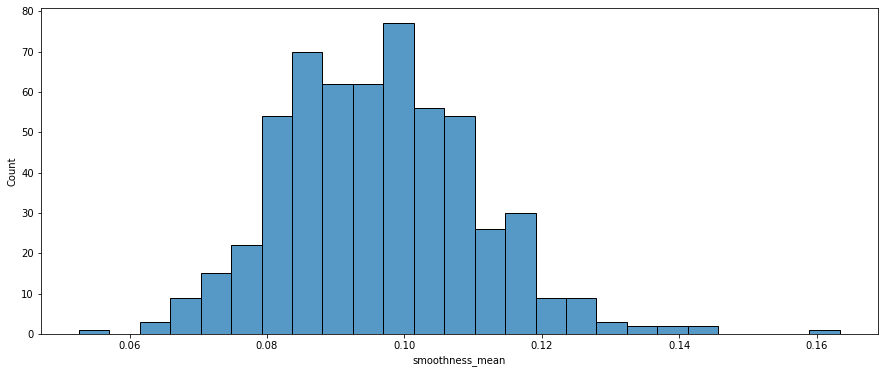

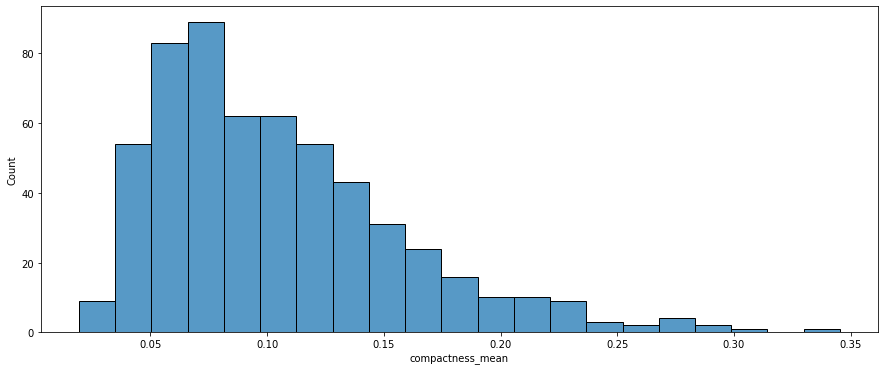

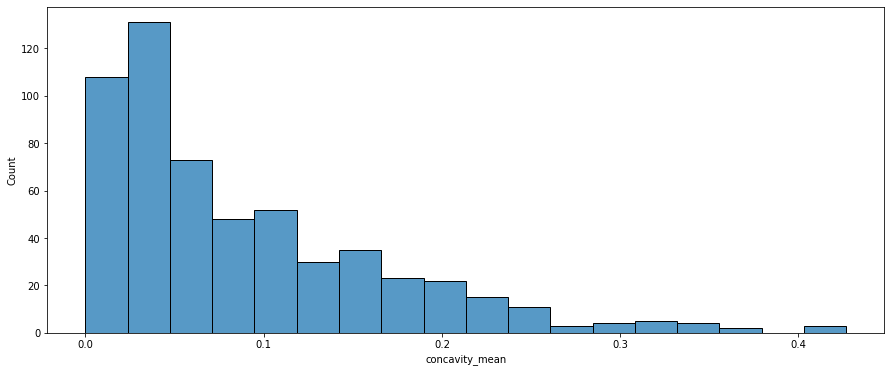

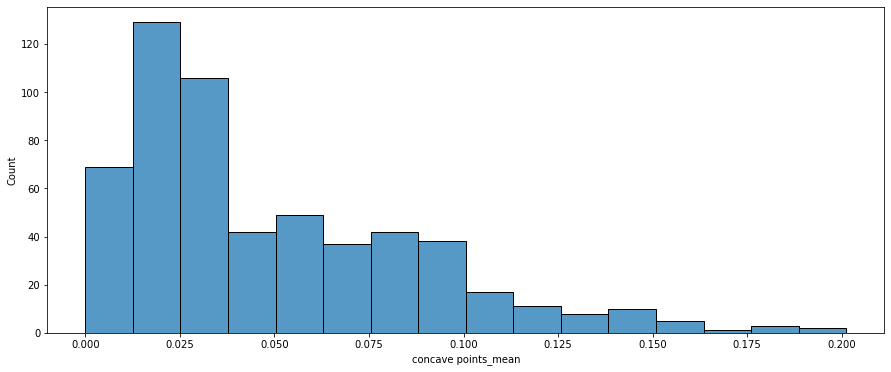

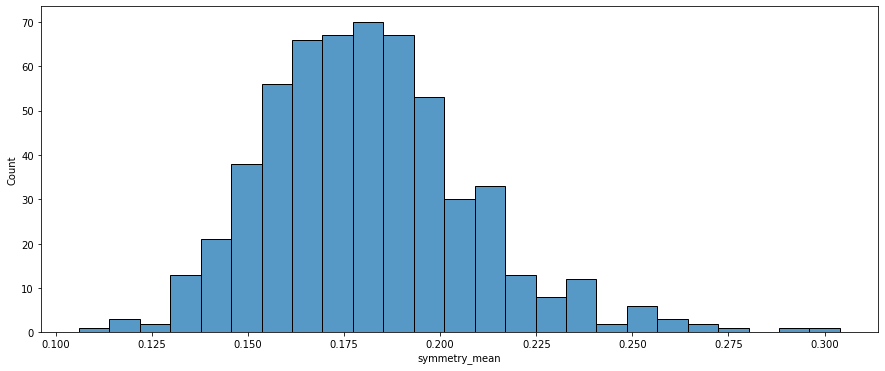

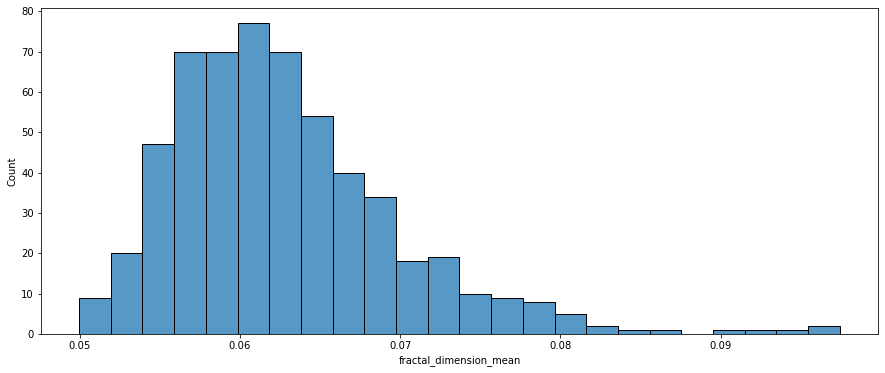

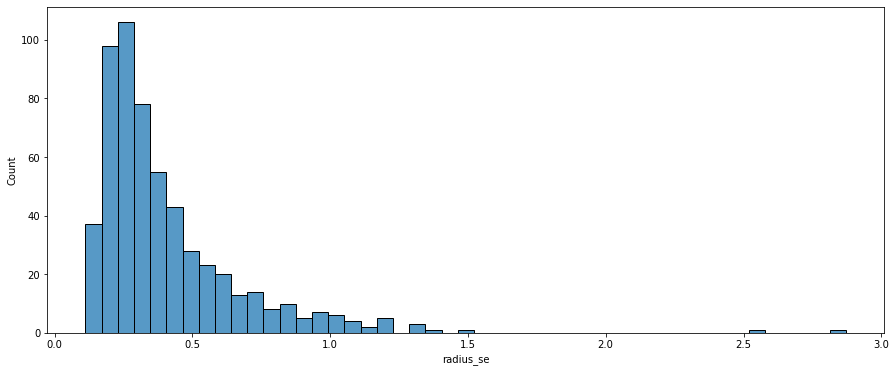

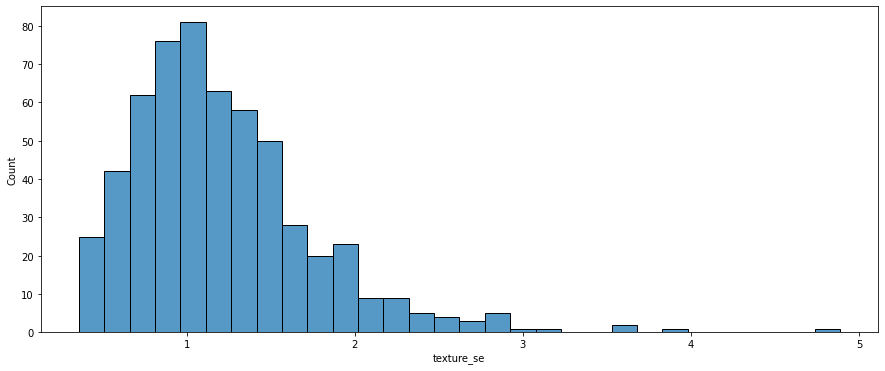

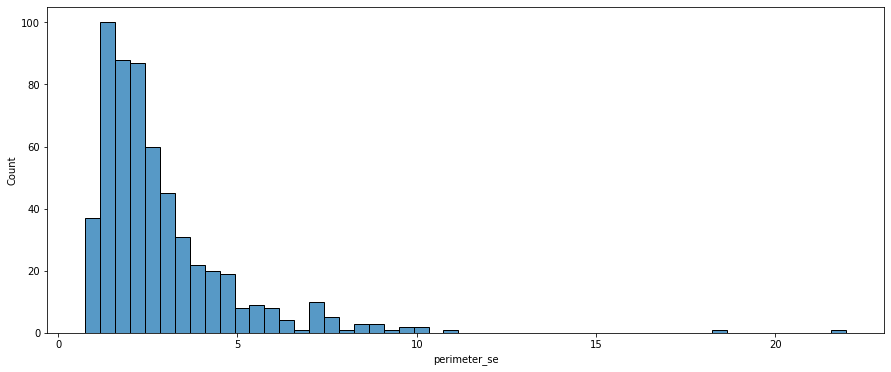

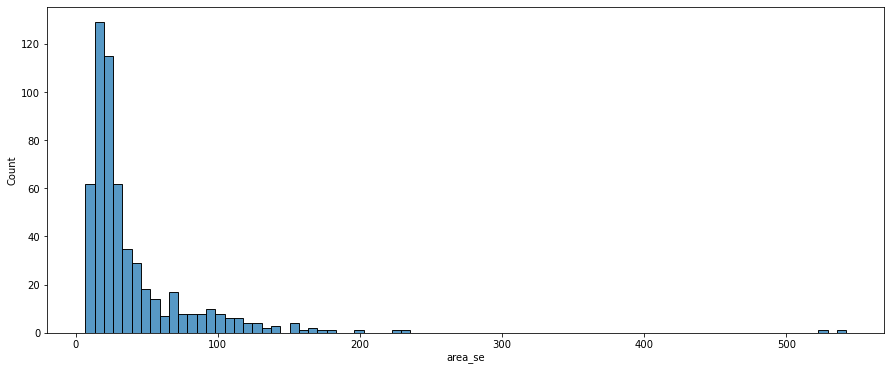

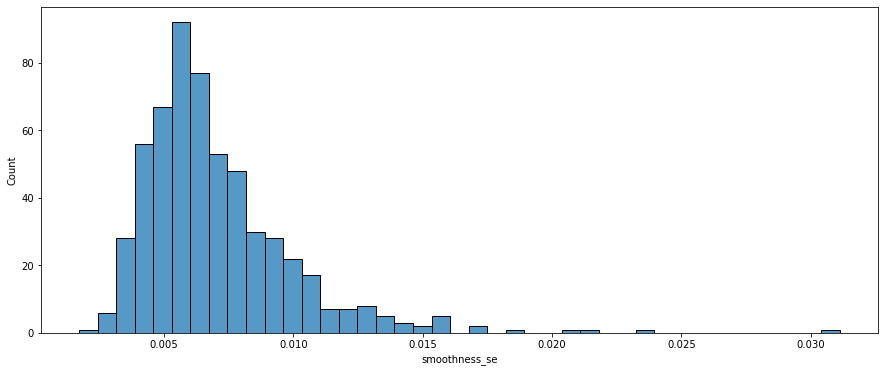

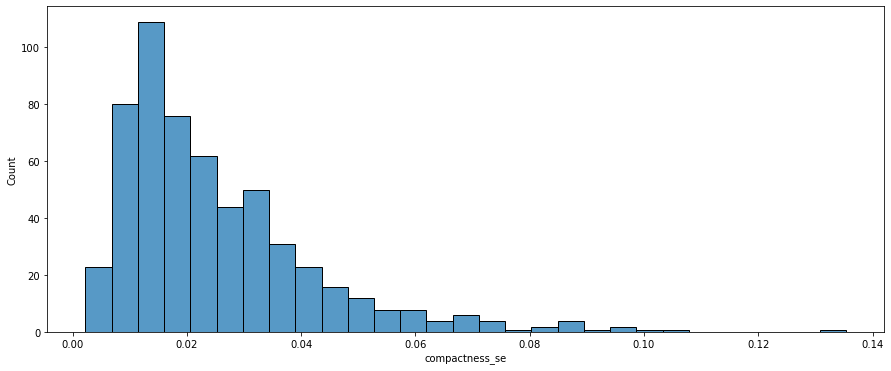

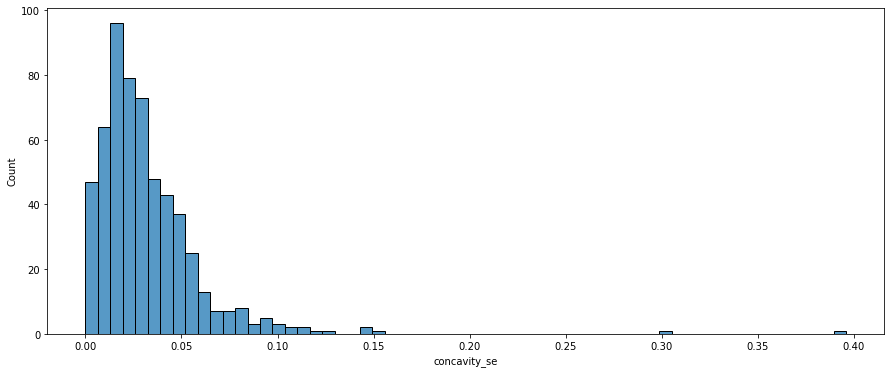

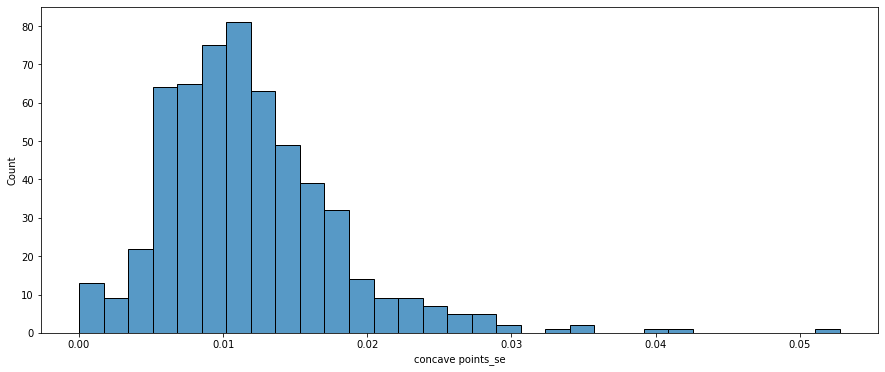

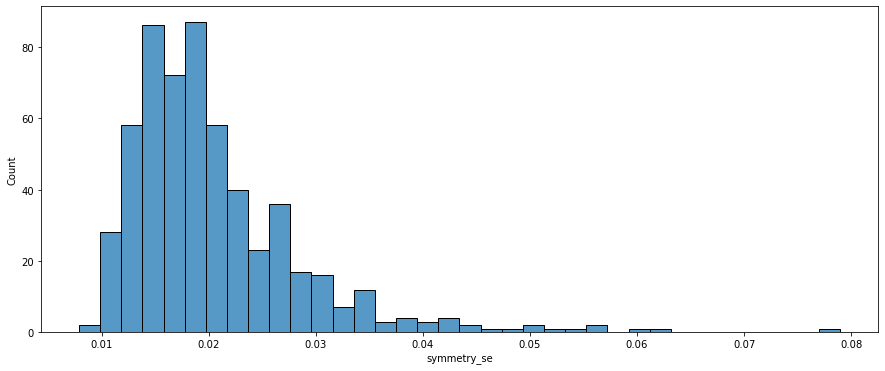

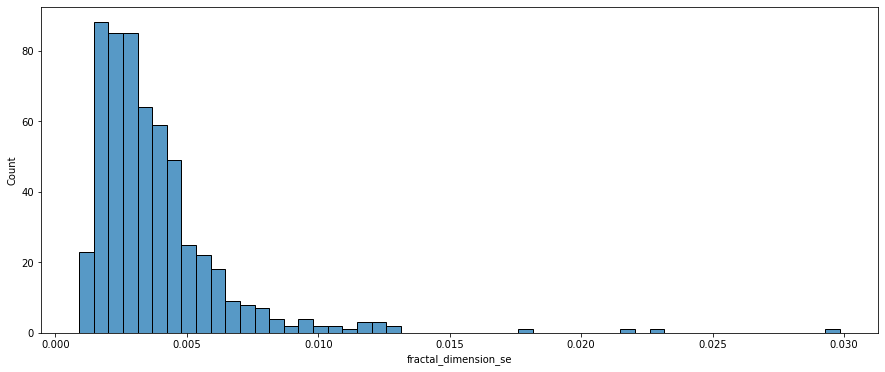

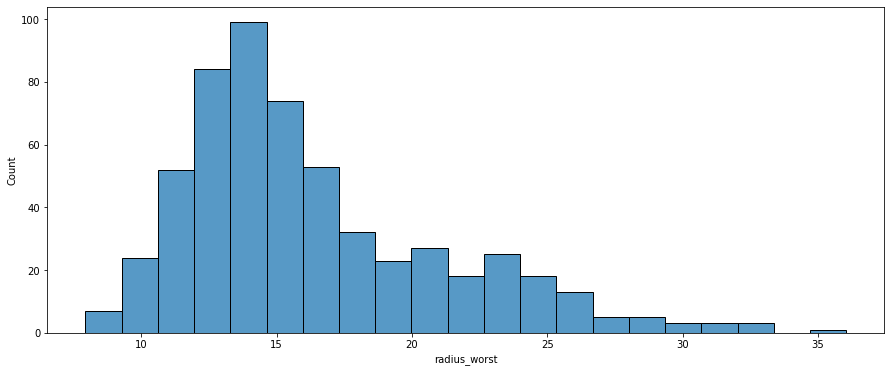

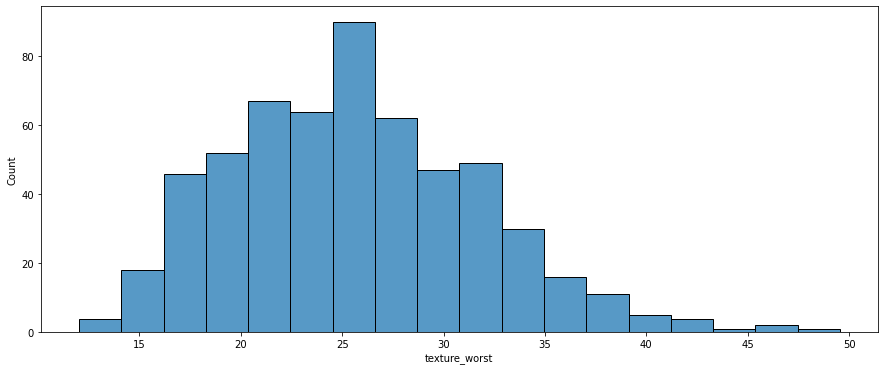

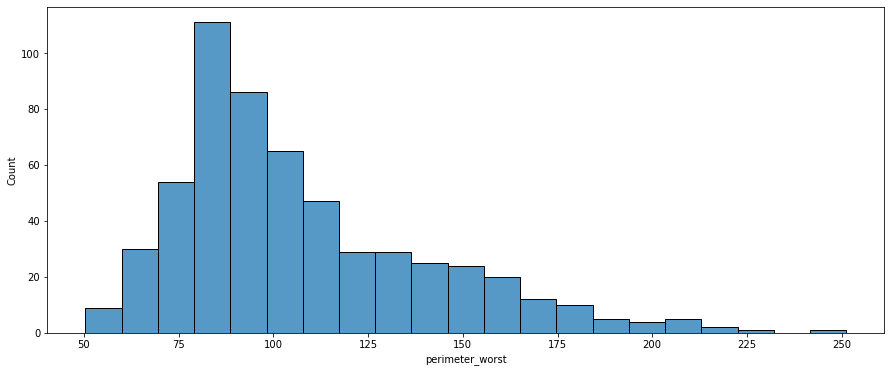

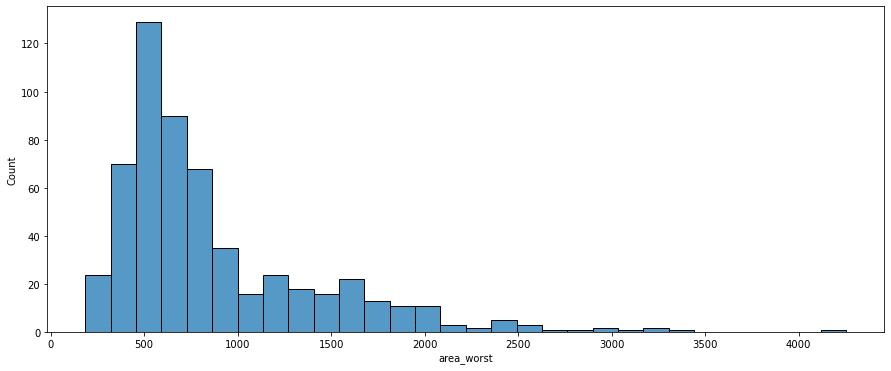

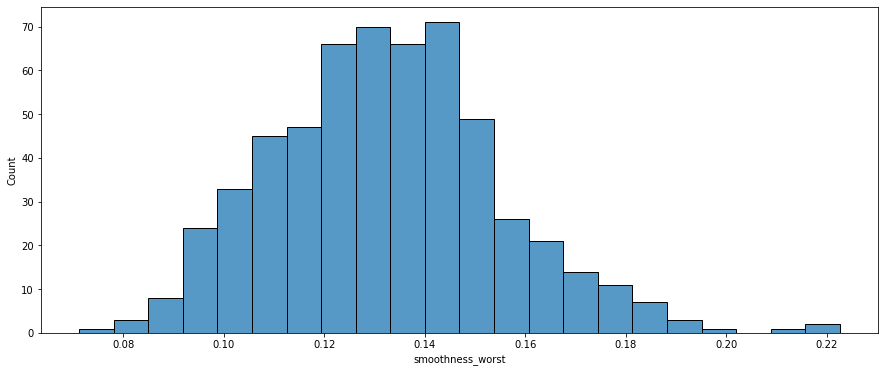

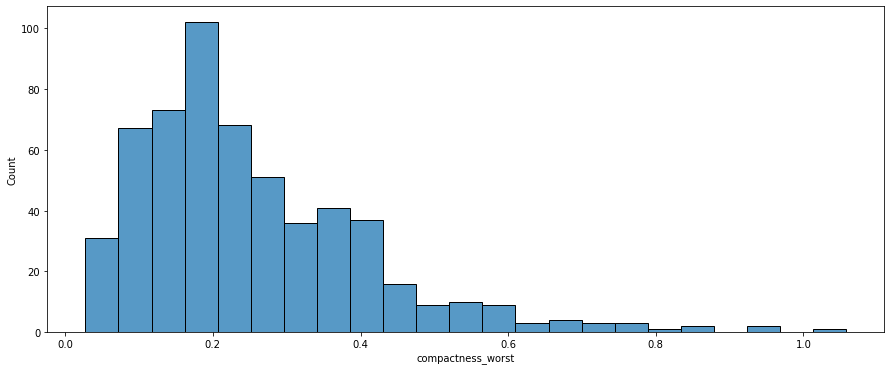

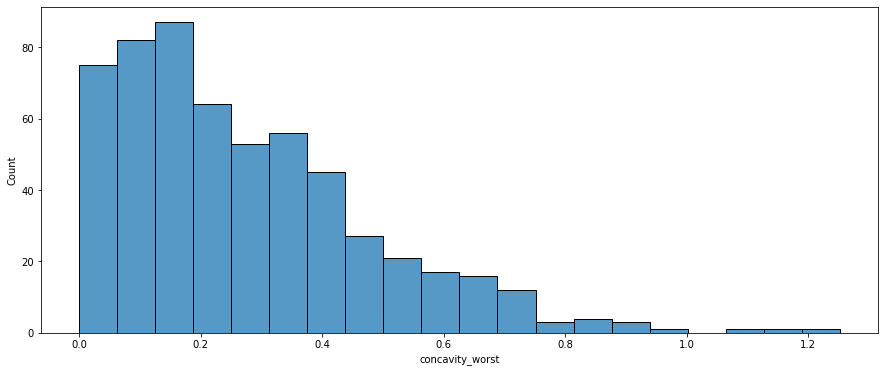

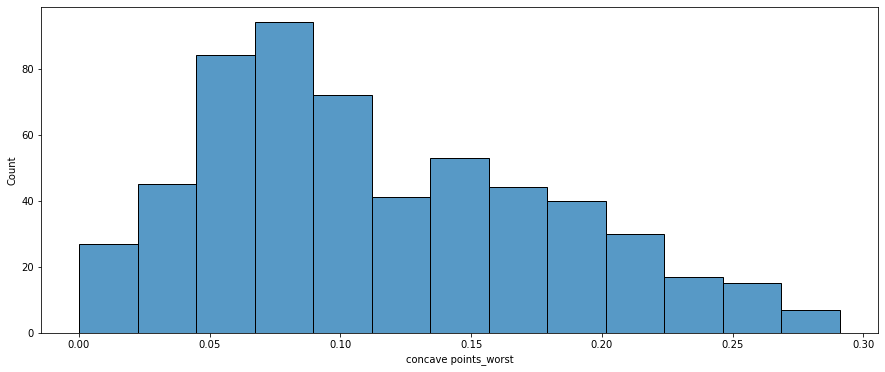

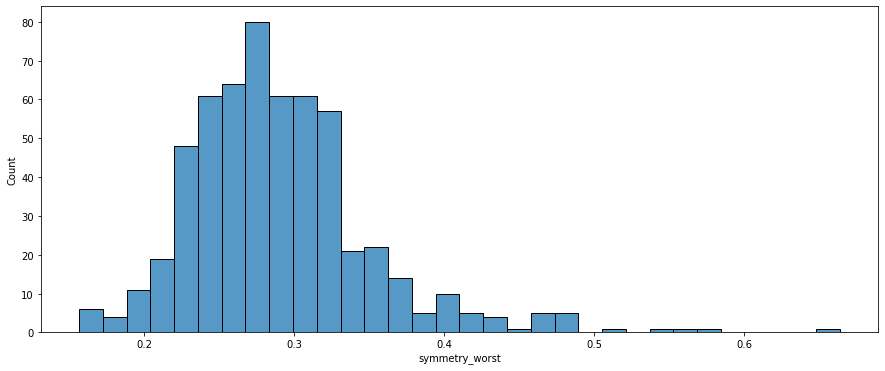

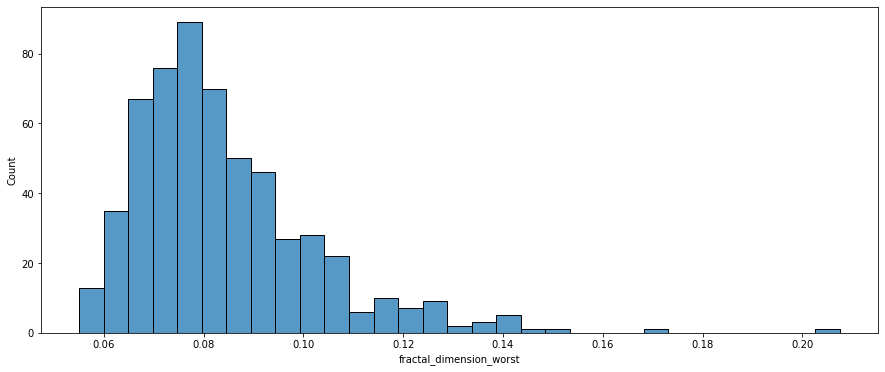

In [43]:
for i in x.columns:
    sns.histplot(df[i])
    plt.show()

In [44]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

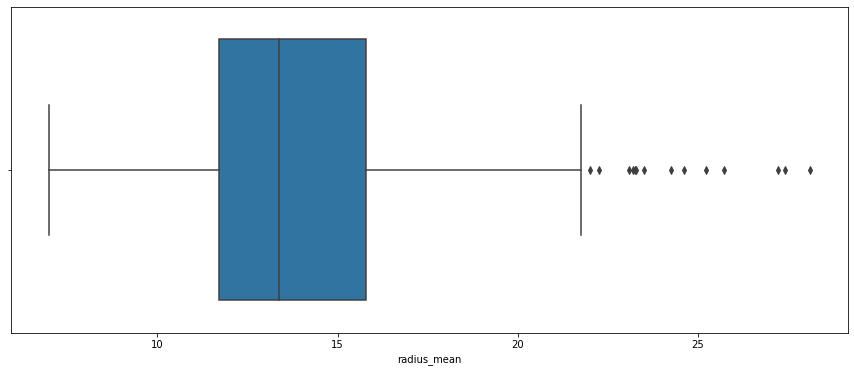

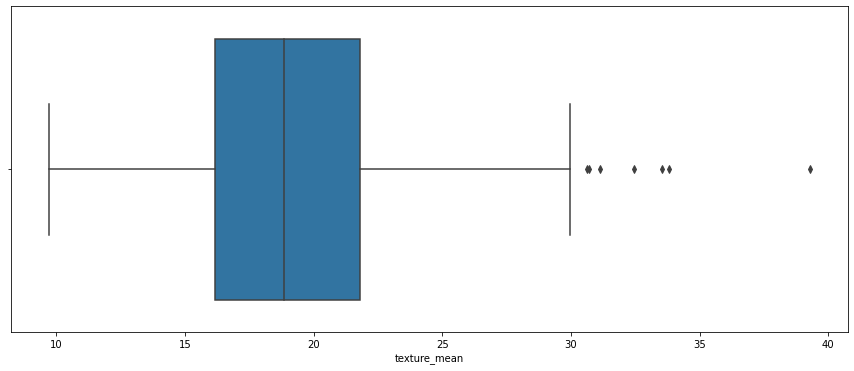

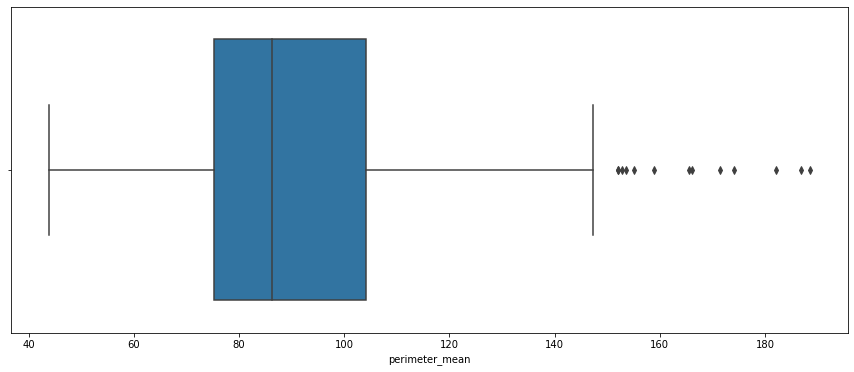

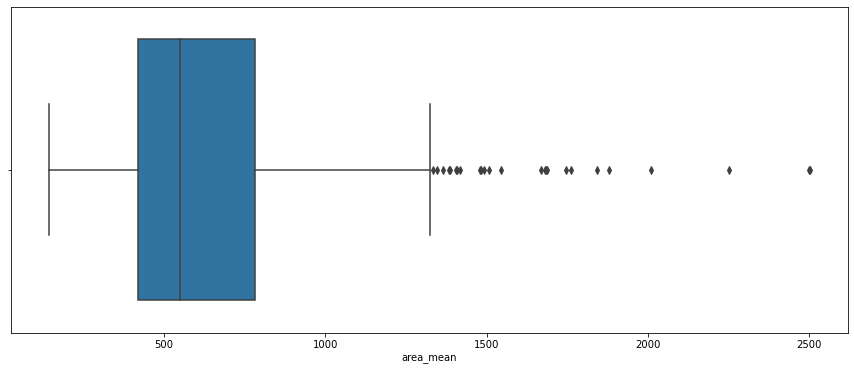

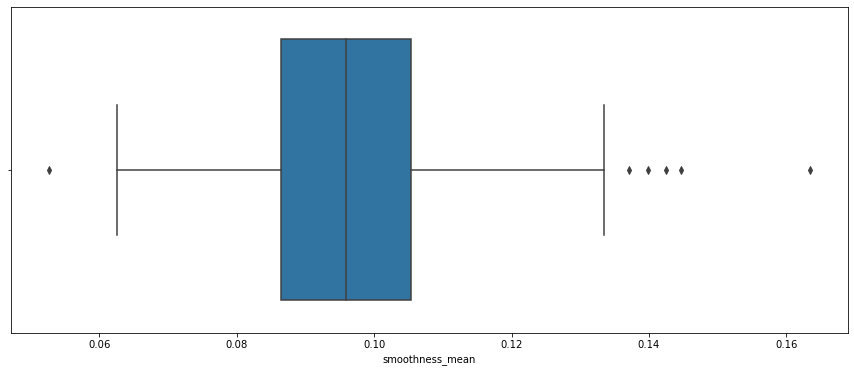

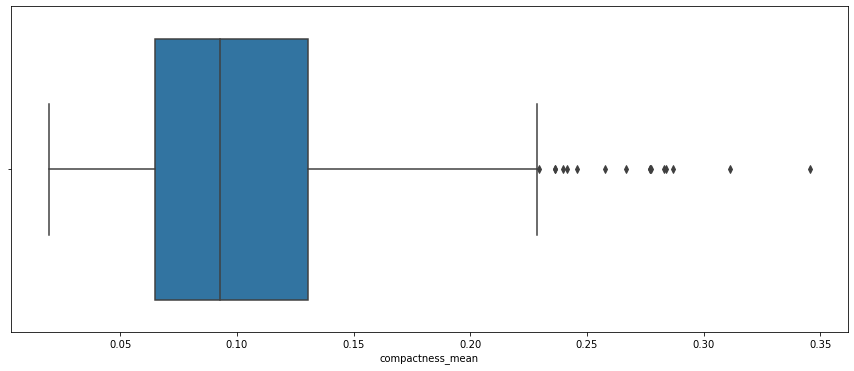

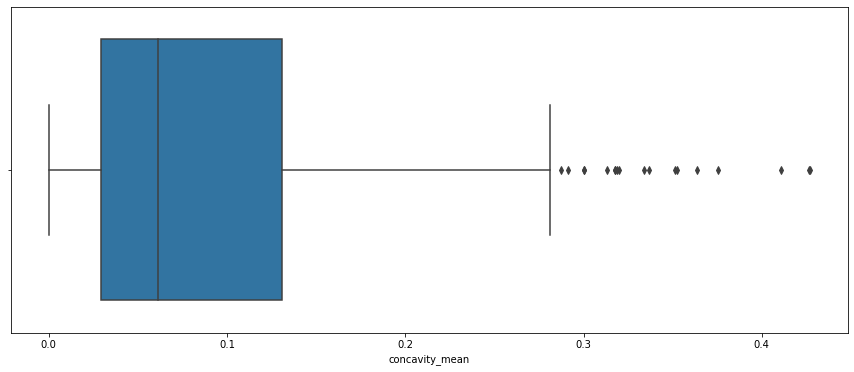

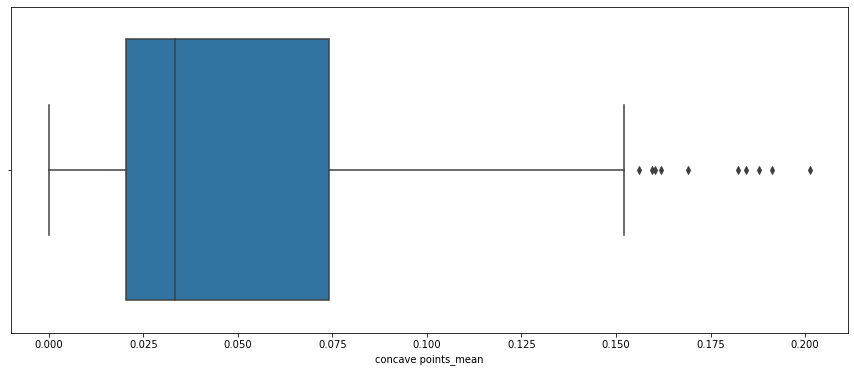

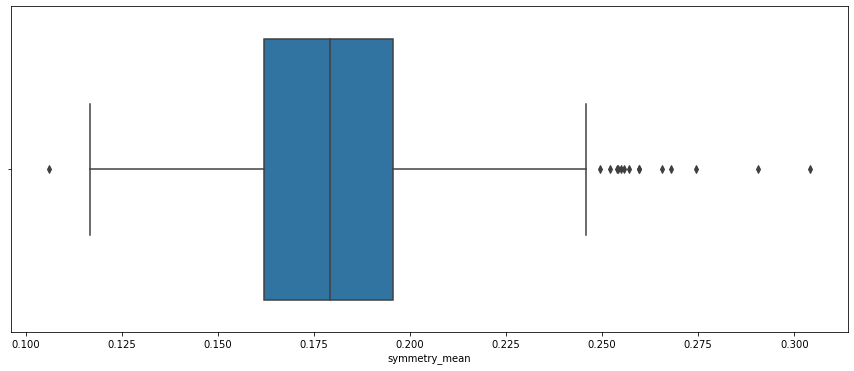

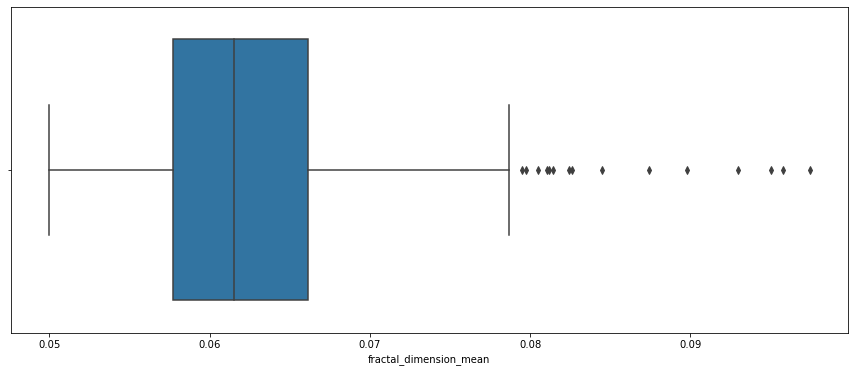

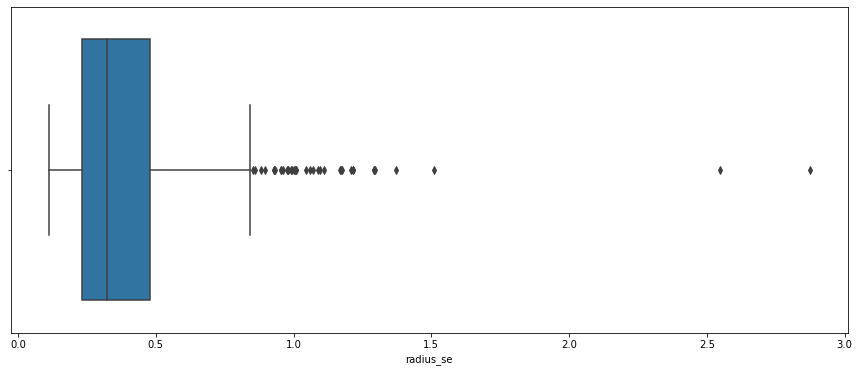

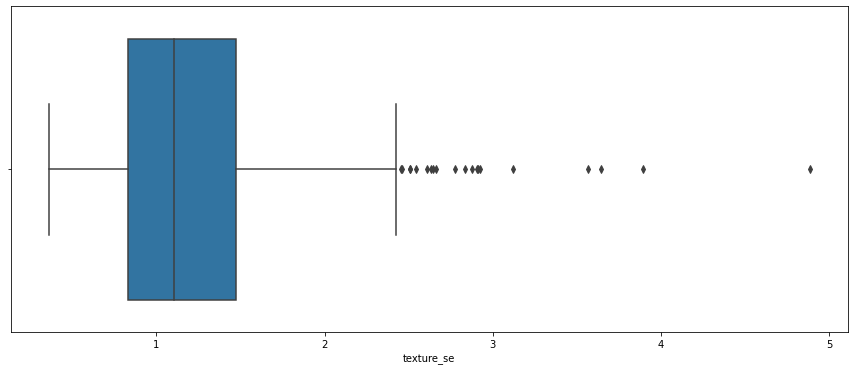

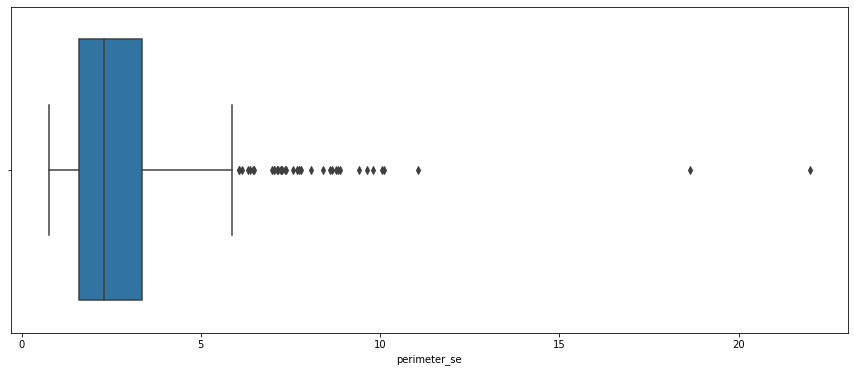

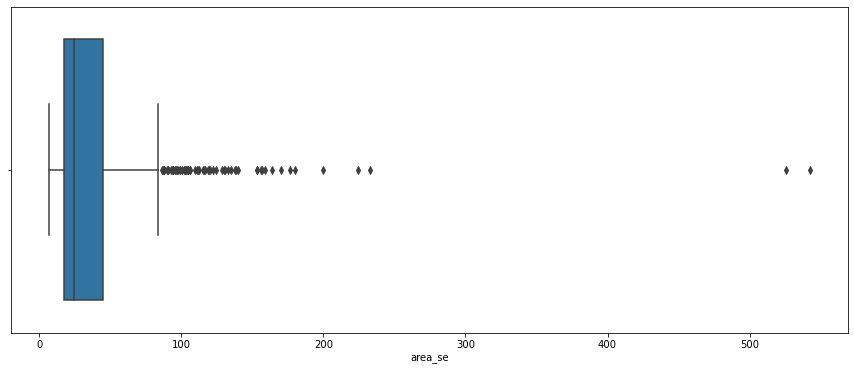

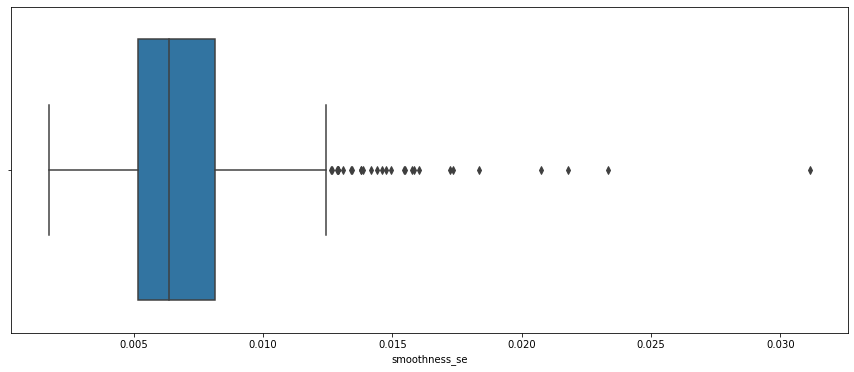

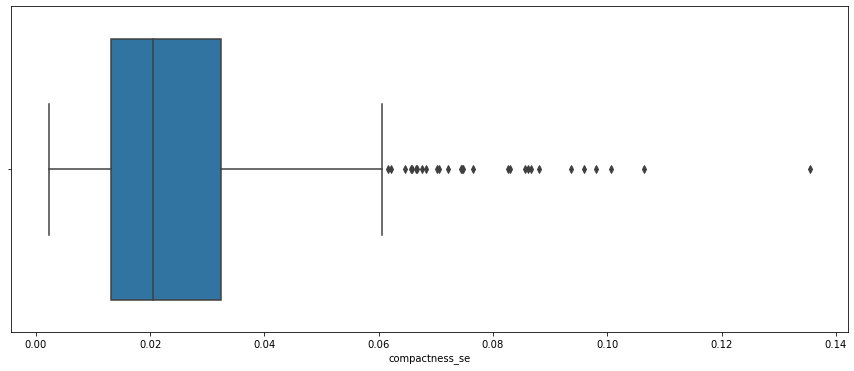

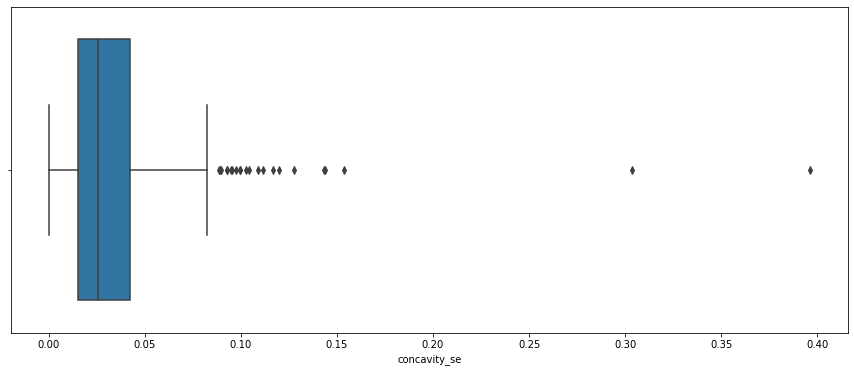

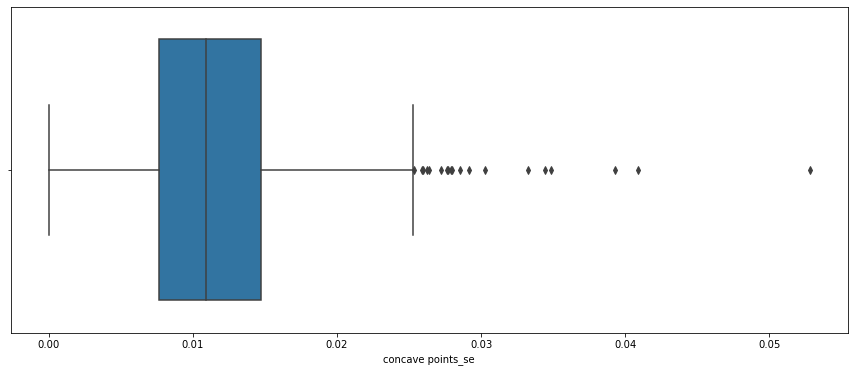

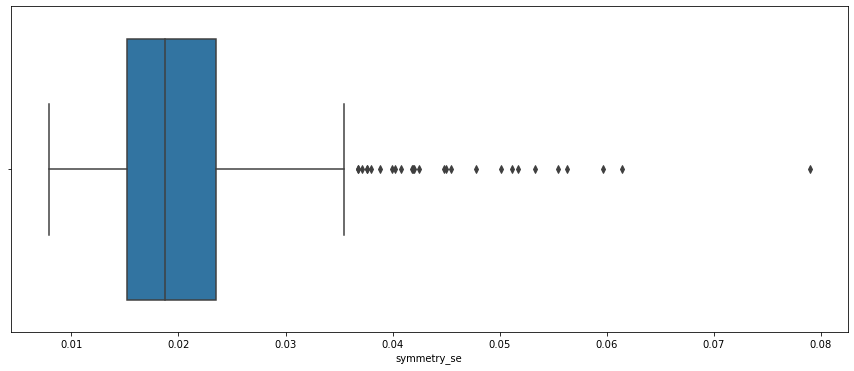

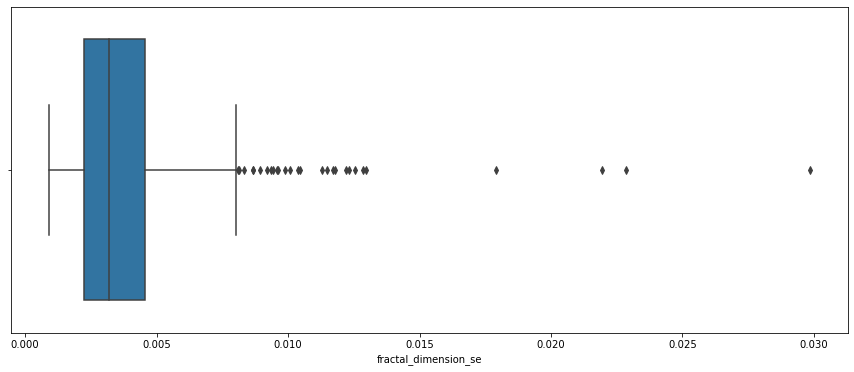

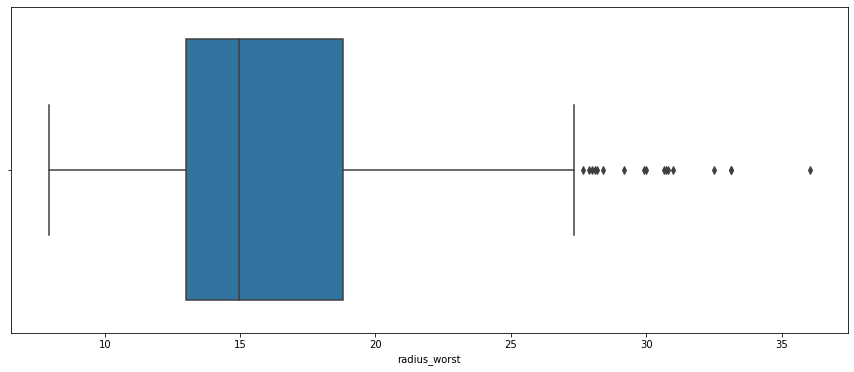

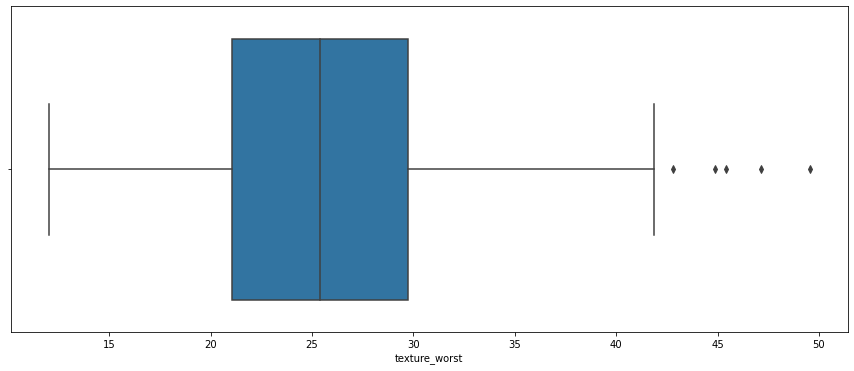

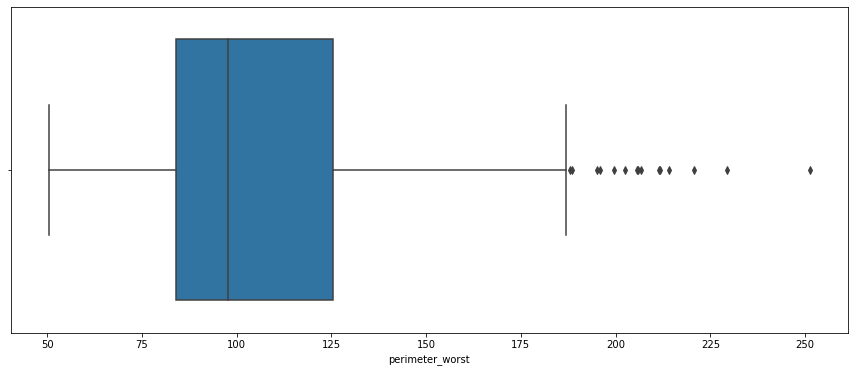

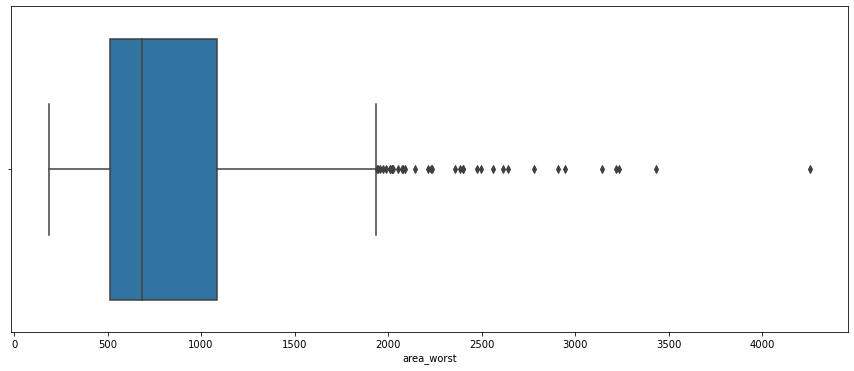

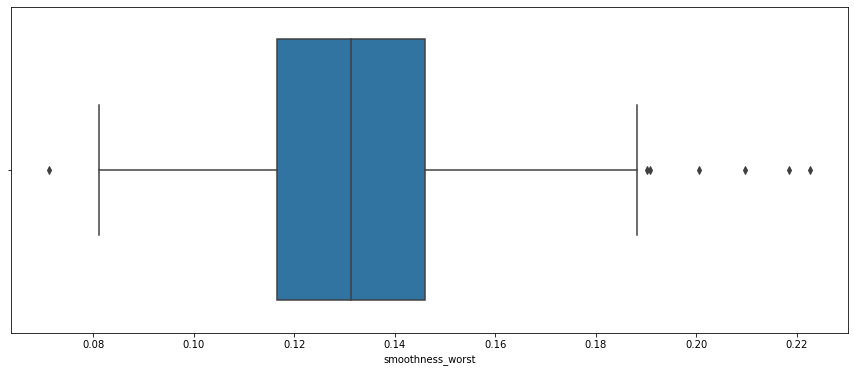

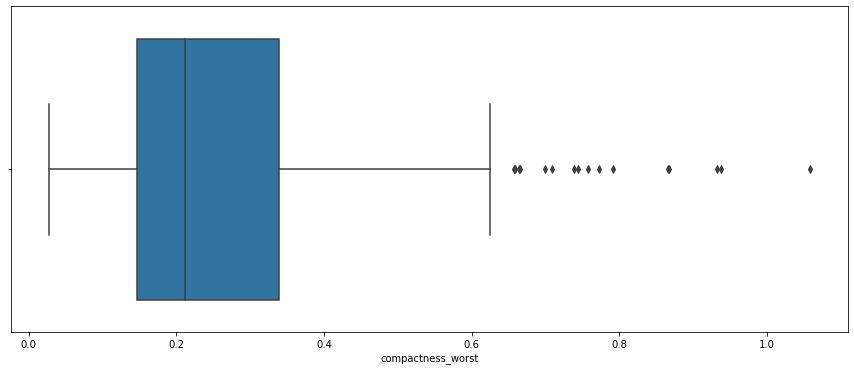

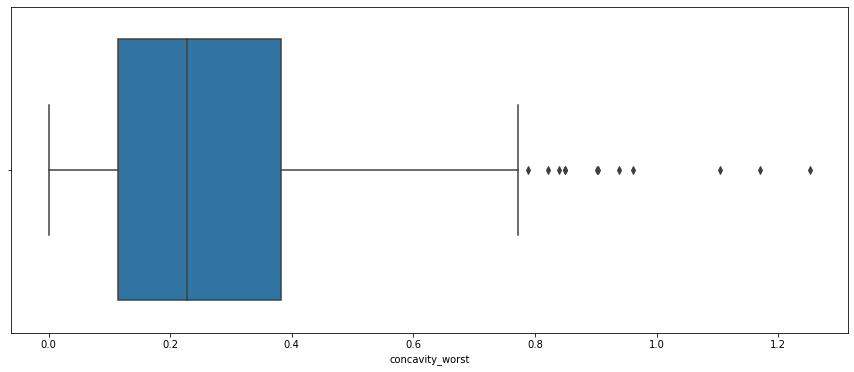

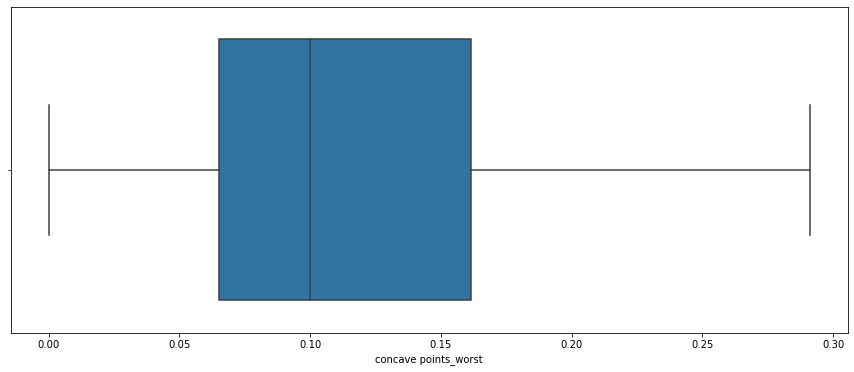

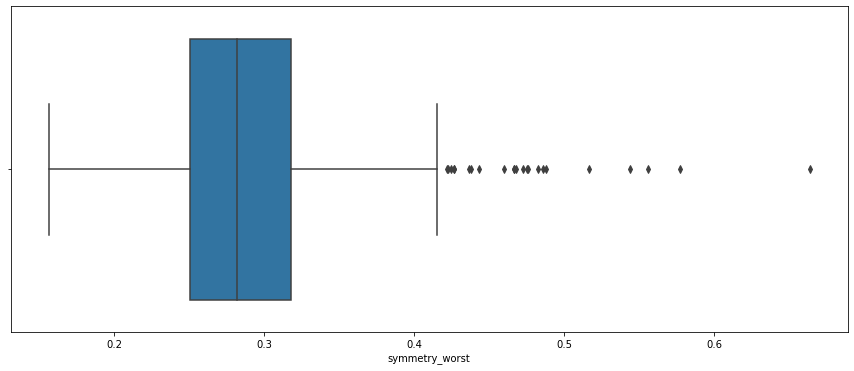

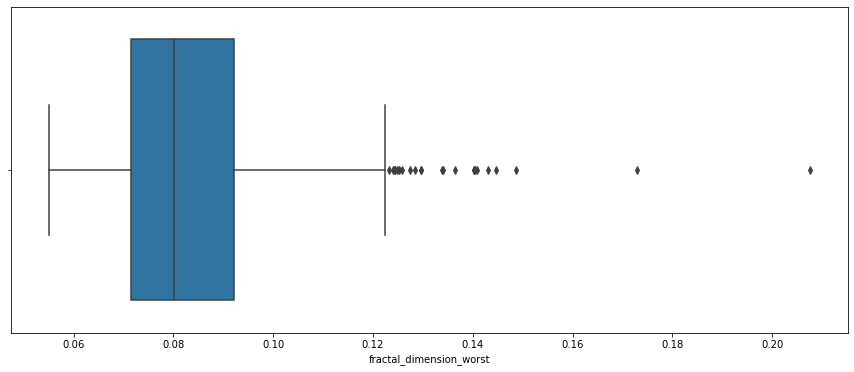

In [47]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

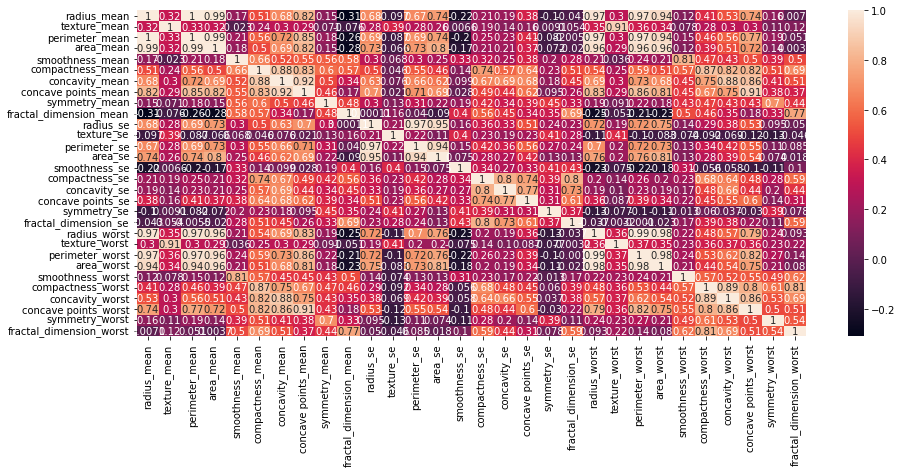

In [67]:
plt.figure.figsize=(25,20)
sns.heatmap(x.corr(),annot=True)

In [68]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [93]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [98]:
from scipy.stats import ttest_ind
a=df[df.diagnosis==0]
b=df[df.diagnosis==1]
test=ttest_ind(a.radius_mean,b.radius_mean)
test

Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262422e-96)

In [101]:
test.pvalue

8.465940572262422e-96

In [111]:
print('Good predictors with p-value :','\n')
GoodPredictors=[]
for i in x.columns:
    a=df[df.diagnosis==0]
    b=df[df.diagnosis==1]
    test=ttest_ind(a[i],b[i])
    if test.pvalue<0.05:
        print(i,'\n','p-value =',test.pvalue,'\n\n')
        GoodPredictors.append(i)
print('GoodPredictors=',GoodPredictors)

Good predictors with p-value : 

radius_mean 
 p-value = 8.465940572262422e-96 


texture_mean 
 p-value = 4.0586360478980736e-25 


perimeter_mean 
 p-value = 8.43625103617473e-101 


area_mean 
 p-value = 4.734564310307344e-88 


smoothness_mean 
 p-value = 1.0518503592032013e-18 


compactness_mean 
 p-value = 3.9382631058873895e-56 


concavity_mean 
 p-value = 9.966555755072963e-84 


concave points_mean 
 p-value = 7.101150161057422e-116 


symmetry_mean 
 p-value = 5.733384028466827e-16 


radius_se 
 p-value = 9.738948656461507e-50 


perimeter_se 
 p-value = 1.6519051758498057e-47 


area_se 
 p-value = 5.8955213926058635e-46 


compactness_se 
 p-value = 9.975994654074766e-13 


concavity_se 
 p-value = 8.260176167970112e-10 


concave points_se 
 p-value = 3.0723087688180654e-24 


radius_worst 
 p-value = 8.482291921684414e-116 


texture_worst 
 p-value = 1.0780574879494241e-30 


perimeter_worst 
 p-value = 5.771397139668621e-119 


area_worst 
 p-value = 2.82884770428669

In [112]:
print('Its accepting the null hypothesis so their is statistical mean difference between variable so we are going to accept the null hypothesis','\n')

Badpredictors=[]
for i in x.columns:
    a=df[df.diagnosis==0]
    b=df[df.diagnosis==1]
    test=ttest_ind(a[i],b[i])
    if test.pvalue>0.05:
        print(i,'\n','p-value =',test.pvalue,'\n')
        Badpredictors.append(i)
print('Badpredictors =',Badpredictors)

Its accepting the null hypothesis so their is statistical mean difference between variable so we are going to accept the null hypothesis 

fractal_dimension_mean 
 p-value = 0.7599368037256238 

texture_se 
 p-value = 0.8433320287670163 

smoothness_se 
 p-value = 0.11029660865789295 

symmetry_se 
 p-value = 0.8766418183858812 

fractal_dimension_se 
 p-value = 0.06307355082239346 

Badpredictors = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


In [113]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [114]:
x=df[GoodPredictors]
y=df['diagnosis']

In [116]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [118]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Will perform SMOTE operation

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [126]:
train=pd.concat([x_train,y_train],axis=1)

In [127]:
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.2619,1.778,16.85,0.01449,0.01690,0.008043,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664,0
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.3077,2.240,20.20,0.02148,0.02991,0.010450,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662,0
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.2387,1.729,21.83,0.01246,0.01831,0.008747,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012,0
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.3661,2.410,24.44,0.01179,0.01131,0.015190,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376,0
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.2239,1.577,18.04,0.01205,0.00941,0.004551,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203,0


In [132]:
not_subsc=train[train.diagnosis==0]
print('not_subsc',len(not_subsc))
subsc=train[train.diagnosis==1]
print('subsc',len(subsc))

not_subsc 290
subsc 165


In [137]:
from sklearn.utils import resample
subsc_os=resample(subsc,replace=True,n_samples=len(not_subsc),random_state=0)

In [138]:
len(subsc_os)

290

In [139]:
train_os=pd.concat([not_subsc,subsc_os])

In [143]:
len(train_os[train_os.diagnosis==0])

290

In [145]:
len(train_os[train_os.diagnosis==1])

290

In [146]:
train_os.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.2619,1.778,16.85,0.01449,0.01690,0.008043,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664,0
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.3077,2.240,20.20,0.02148,0.02991,0.010450,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662,0
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.2387,1.729,21.83,0.01246,0.01831,0.008747,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012,0
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.3661,2.410,24.44,0.01179,0.01131,0.015190,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376,0
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.2239,1.577,18.04,0.01205,0.00941,0.004551,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203,0


In [150]:
x_trainos=train_os.loc[:,train_os.columns!='diagnosis']            # only predictors
y_trainos=train_os.loc[:,train_os.columns=='diagnosis']            # only traget variable

In [166]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()
DTCFIT=DTC.fit(x_trainos,y_trainos)
DTCFIT

DecisionTreeClassifier()

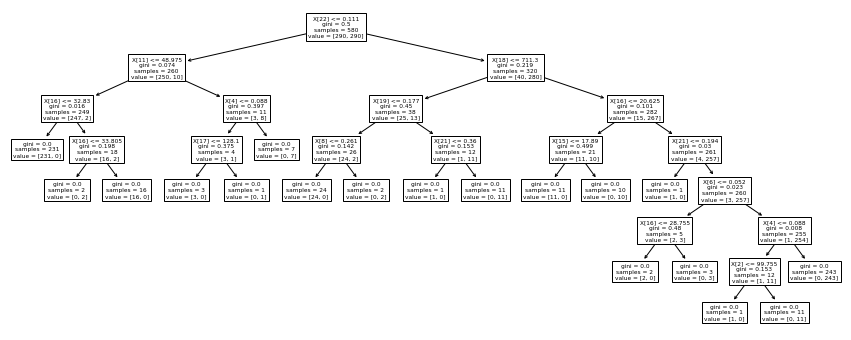

In [152]:
from sklearn import tree
tree.plot_tree(DTC.fit(x_trainos,y_trainos))
plt.show()

# max Depth 6

In [153]:
y_predDTC=DTC.predict(x_test)
y_predDTC

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predDTC)

array([[61,  6],
       [ 6, 41]], dtype=int64)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predDTC))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.87      0.87      0.87        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



In [164]:
from sklearn.metrics import accuracy_score
as_DTC=accuracy_score(y_test,y_predDTC)
as_DTC

0.8947368421052632

In [167]:
predict_proba_DTC=DTCFIT.predict_proba(x_test)[:,1]

In [170]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_DTC,tpr_DTC,thresholds=metrics.roc_curve(y_test,predict_proba_DTC)

In [171]:
fpr_DTC

array([0.        , 0.10447761, 1.        ])

In [172]:
tpr_DTC

array([0.        , 0.87234043, 1.        ])

In [174]:
auc_DTC=auc(fpr_DTC,tpr_DTC)
auc_DTC

0.8839314067958082

<Figure size 720x1440 with 0 Axes>

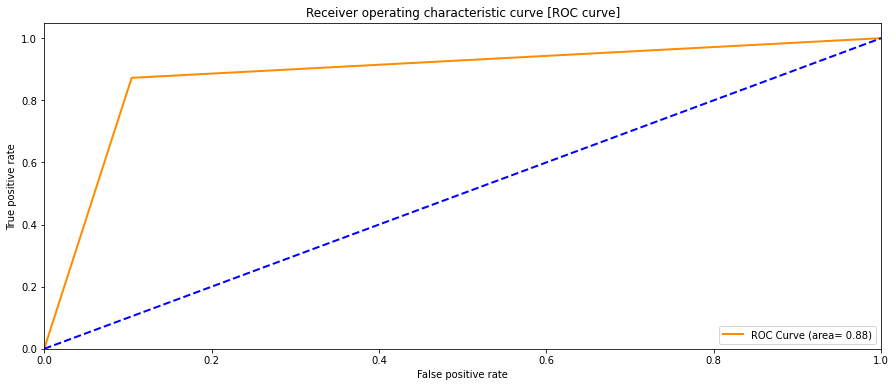

In [183]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fpr_DTC,tpr_DTC,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%auc_DTC)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Bagging

In [184]:
from sklearn.ensemble import BaggingClassifier

In [186]:
bc=BaggingClassifier(base_estimator=DTC,n_estimators=300,bootstrap=True,n_jobs=-1,oob_score=True)
bc.fit(x_trainos,y_trainos)
y_predB=bc.predict(x_test)

In [187]:
pd.crosstab(y_test,y_predB,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,63,4,67
1,3,44,47
All,66,48,114


In [189]:
print(classification_report(y_test,y_predB))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [190]:
probPB=bc.predict_proba(x_test)[:,1]

In [192]:
from sklearn import metrics 
fprPB,tprPB,thresholdPB=metrics.roc_curve(y_test,probPB)

In [195]:
aucPB=auc(fprPB,tprPB)
aucPB

0.9901556049539536

<Figure size 720x1440 with 0 Axes>

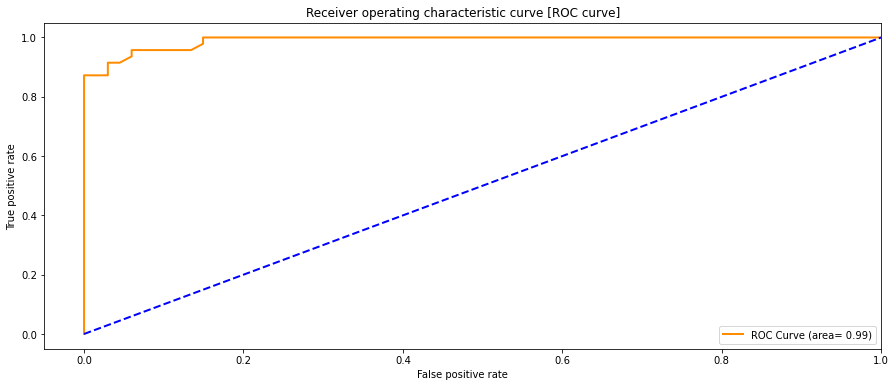

In [219]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fprPB,tprPB,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%aucPB)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(max_features='sqrt')
RFCFit=RFC.fit(x_trainos,y_trainos)

In [203]:
y_predRF=RFC.predict(x_test)

In [204]:
pd.crosstab(y_test,y_predRF,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,65,2,67
1,4,43,47
All,69,45,114


In [207]:
from sklearn.metrics import classification_report

In [209]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [216]:
probRF=RFCFit.predict_proba(x_test)[:,1]

In [217]:
fprRF,tprRF,thresholds=metrics.roc_curve(y_test,probRF)

In [218]:
aucRF=auc(fprRF,tprRF)
aucRF

0.9944426802159416

<Figure size 720x1440 with 0 Axes>

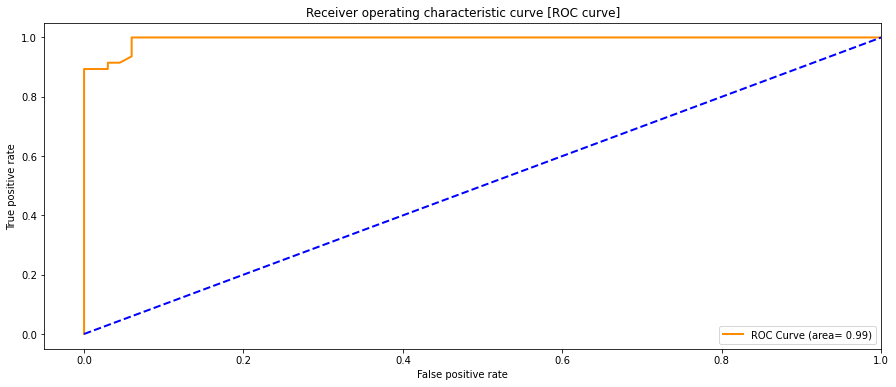

In [221]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fprRF,tprRF,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%aucRF)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Importance of Variables

In [226]:
fi=pd.DataFrame({'features':list(x_train.columns),'importance':RFCFit.feature_importances_}).sort_values('importance',ascending=False)
fi

,features,importance
22,concave points_worst,0.183346
7,concave points_mean,0.126683
18,area_worst,0.105235
17,perimeter_worst,0.102765
15,radius_worst,0.097087
11,area_se,0.055638
21,concavity_worst,0.051309
6,concavity_mean,0.045009
0,radius_mean,0.030984
3,area_mean,0.024407


# Gradient Boosting Classifier

In [236]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()
GBCFIT=GBC.fit(x_trainos,y_trainos)
pred_GB=GBC.predict(x_test)

In [239]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_GB)

array([[64,  3],
       [ 4, 43]], dtype=int64)

In [242]:
pd.crosstab(y_test,pred_GB,margins=True,rownames=['Actual'],colnames=['predict'])

predict,0,1,All
Actual,,,
0,64,3,67
1,4,43,47
All,68,46,114


In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_GB))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [252]:
GB_prob=GBCFIT.predict_proba(x_test)[:,1]

In [253]:
fprGBC,tprGBC,thresholdGBC=metrics.roc_curve(y_test,GB_prob)

In [258]:
aucGBC=auc(fprGBC,tprGBC)
aucGBC

0.9952365830422356

<Figure size 720x1440 with 0 Axes>

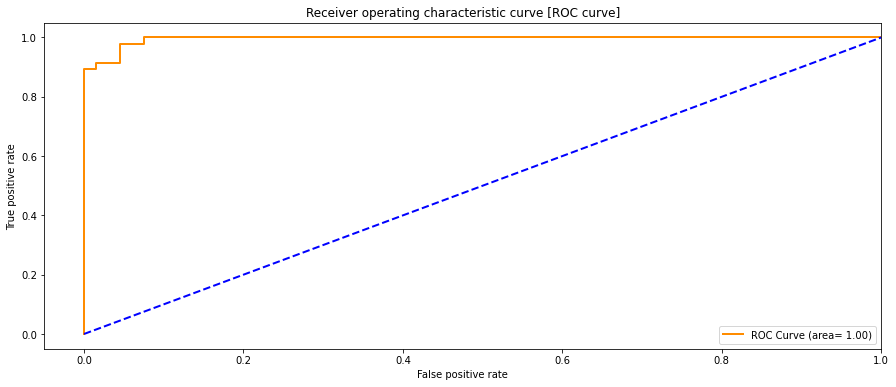

In [259]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fprGBC,tprGBC,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%aucGBC)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Adaptive Boosting Classifier

In [261]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier(base_estimator=DTC,n_estimators=200)

In [267]:
AdaFit=Ada.fit(x_trainos,y_trainos)
Ada_predict=Ada.predict(x_test)
Ada_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [268]:
pd.crosstab(y_test,Ada_predict,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,59,8,67
1,7,40,47
All,66,48,114


In [272]:
print(classification_report(y_test,Ada_predict))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        67
           1       0.83      0.85      0.84        47

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.86       114
weighted avg       0.87      0.87      0.87       114



In [280]:
Ada_prob=AdaFit.predict_proba(x_test)[:,1]
Ada_prob

array([1.00000000e+00, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 1.00000000e+00, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 1.00000000e+00, 1.00000000e+00,
       2.22044605e-16, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 2.22044605e-16, 2.22044605e-16,
       1.00000000e+00, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       1.00000000e+00, 1.00000000e+00, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
      

In [281]:
fpr_Ada,tpr_Ada,threshold_Ada=metrics.roc_curve(y_test,Ada_prob)

In [283]:
auc_Ada=auc(fpr_Ada,tpr_Ada)
auc_Ada

0.8658304223563036

<Figure size 720x1440 with 0 Axes>

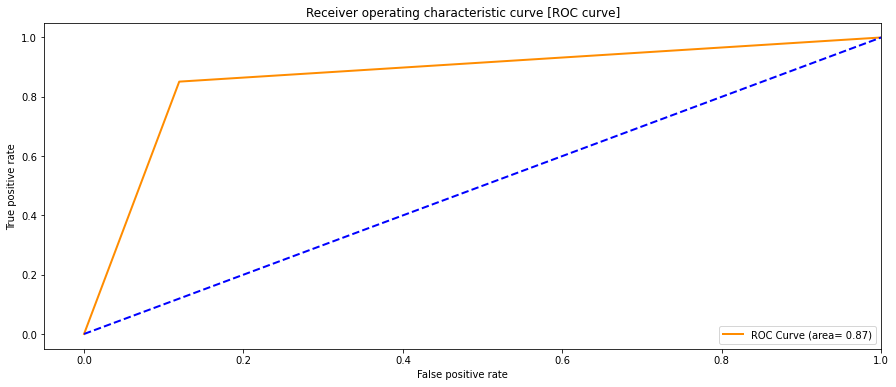

In [284]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fpr_Ada,tpr_Ada,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%auc_Ada)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# very best practice to perform the model  Using Jeevan's Method

In [289]:
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC     # support vector machine[S.V.M],support vector classifier [S.V.C]
from sklearn.tree import DecisionTreeClassifier

In [291]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [302]:
x_trainos.shape

(580, 25)

In [303]:
y_trainos.shape

(580, 1)

In [304]:
x_test.shape

(114, 25)

In [305]:
y_test.shape

(114,)

In [307]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_trainos,y_trainos)

SVC()

In [308]:
y_pred=svc.predict(x_test)

In [309]:
model=['accuracy_score','confusion_matrix','classification_report']
new_df=pd.DataFrame(columns=model)
model1=pd.Series({'model':'SVC','accuracy_score':accuracy_score(y_test,y_pred),
                 'confusion_matrix':confusion_matrix(y_test,y_pred),
                 'classification_report':classification_report(y_test,y_pred)})

new_df=new_df.append(model1,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC


In [315]:
logi=LogisticRegression()
logi.fit(x_trainos,y_trainos)
y_pred2=logi.predict(x_test)
model2=pd.Series({'model':'logistic','accuracy_score':accuracy_score(y_test,y_pred2),
                 'confusion_matrix':confusion_matrix(y_test,y_pred2),
                 'classification_report':classification_report(y_test,y_pred2)})

new_df=new_df.append(model2,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic


In [316]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred3=rfc.predict(x_test)
model3=pd.Series({'model':"random f.c",'accuracy_score':accuracy_score(y_test,y_pred3),
                 'confusion_matrix':confusion_matrix(y_test,y_pred3),
                 'classification_report':classification_report(y_test,y_pred)})

new_df=new_df.append(model3,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic
2,0.964912,"[[65, 2], [2, 45]]",precision recall f1-score ...,random f.c


In [320]:
dtc=DecisionTreeClassifier()
dtc.fit(x_trainos,y_trainos)
y_pred4=dtc.predict(x_test)
model4=pd.Series({'model':'Decission t.c','accuracy_score':accuracy_score(y_test,y_pred),
                 'confusion_matrix':confusion_matrix(y_test,y_pred4),
                 'classification_report':classification_report(y_test,y_pred4)})
new_df=new_df.append(model4,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic
2,0.964912,"[[65, 2], [2, 45]]",precision recall f1-score ...,random f.c
3,0.938596,"[[60, 7], [5, 42]]",precision recall f1-score ...,Decission t.c


In [322]:
abc=AdaBoostClassifier()
abc.fit(x_trainos,y_trainos)
y_pred4=abc.predict(x_test)
model4=pd.Series({'model':'Adaptive bc','accuracy_score':accuracy_score(y_test,y_pred4),
                'confusion_matrix':confusion_matrix(y_test,y_pred4),
                 'classification_report':classification_report(y_test,y_pred4)})
new_df=new_df.append(model4,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic
2,0.964912,"[[65, 2], [2, 45]]",precision recall f1-score ...,random f.c
3,0.938596,"[[60, 7], [5, 42]]",precision recall f1-score ...,Decission t.c
4,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Adaptive bc


In [325]:
etc=ExtraTreesClassifier()
etc.fit(x_trainos,y_trainos)
y_pred5=etc.predict(x_test)
model5=pd.Series({"model":'Extra tc','accuracy_score':accuracy_score(y_test,y_pred5),
                 'confusion_matrix':confusion_matrix(y_test,y_pred5),
                 'classification_report':classification_report(y_test,y_pred5)})
new_df=new_df.append(model5,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic
2,0.964912,"[[65, 2], [2, 45]]",precision recall f1-score ...,random f.c
3,0.938596,"[[60, 7], [5, 42]]",precision recall f1-score ...,Decission t.c
4,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Adaptive bc
5,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Extra tc


In [330]:
gbc=GradientBoostingClassifier()
gbc.fit(x_trainos,y_trainos)
y_pred6=gbc.predict(x_test)
model6=pd.Series({'model':'Gradient bc','accuracy_score':accuracy_score(y_test,y_pred6),
                 'confusion_matrix':confusion_matrix(y_test,y_pred6),
                 'classification_report':classification_report(y_test,y_pred6)})
new_df=new_df.append(model6,ignore_index=True)
new_df

,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic
2,0.964912,"[[65, 2], [2, 45]]",precision recall f1-score ...,random f.c
3,0.938596,"[[60, 7], [5, 42]]",precision recall f1-score ...,Decission t.c
4,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Adaptive bc
5,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Extra tc
6,0.947368,"[[64, 3], [3, 44]]",precision recall f1-score ...,Gradient bc


In [331]:
sgd=SGDClassifier()
sgd.fit(x_trainos,y_trainos)
y_pred7=sgd.predict(x_test)
model7=pd.Series({'model':'SGD','accuracy_score':accuracy_score(y_test,y_pred7),
                 'confusion_matrix':confusion_matrix(y_test,y_pred7),
                 'classification_report':classification_report(y_test,y_pred7)})
new_df=new_df.append(model7,ignore_index=True)
new_df


,accuracy_score,confusion_matrix,classification_report,model
0,0.938596,"[[63, 4], [3, 44]]",precision recall f1-score ...,SVC
1,0.929825,"[[60, 7], [1, 46]]",precision recall f1-score ...,logistic
2,0.964912,"[[65, 2], [2, 45]]",precision recall f1-score ...,random f.c
3,0.938596,"[[60, 7], [5, 42]]",precision recall f1-score ...,Decission t.c
4,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Adaptive bc
5,0.964912,"[[66, 1], [3, 44]]",precision recall f1-score ...,Extra tc
6,0.947368,"[[64, 3], [3, 44]]",precision recall f1-score ...,Gradient bc
7,0.833333,"[[67, 0], [19, 28]]",precision recall f1-score ...,SGD


In [345]:
new_df[['accuracy_score','model']].max()

accuracy_score      0.964912
model             random f.c
dtype: object